# Setup

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_circles, make_classification, load_iris, load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, metrics, model_selection
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

# Решающие деревья

### Визуализируем решаюшее дерево для знакомого датасета Iris

In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

In [4]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
# clf.predict(X_test)

DecisionTreeClassifier(max_depth=2, random_state=42)

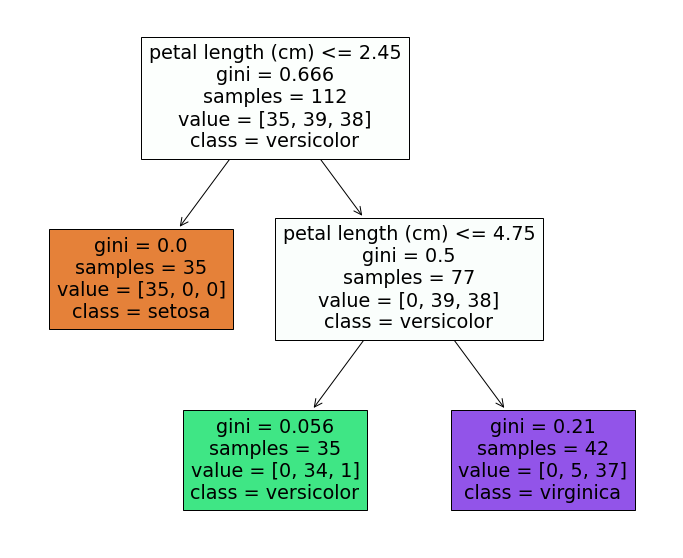

In [5]:
plt.figure(figsize=(12,10))
_ = tree.plot_tree(clf, 
                feature_names=iris.feature_names,  
                class_names=iris.target_names,
                filled=True)

### Посмотрим как выглядит разделяющая плоскость

#### Создадим легко разделимый датасет

In [6]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=42, cluster_std=3)

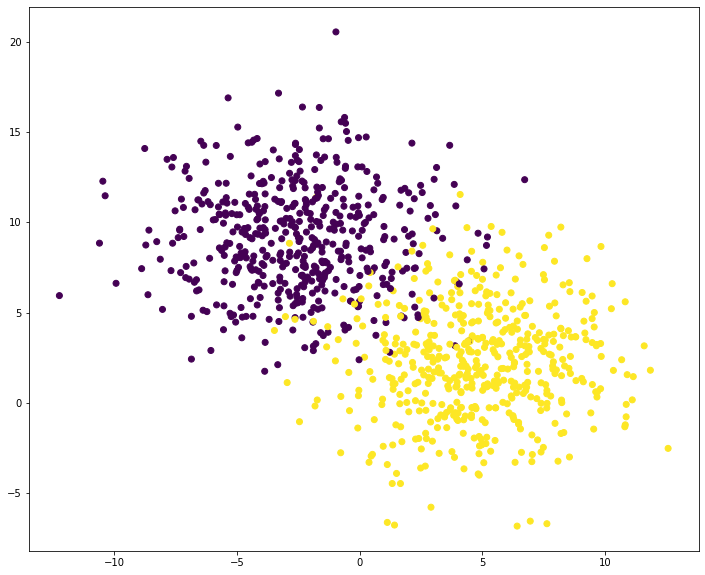

In [7]:
plt.figure(figsize=(12,10))
plt.scatter(X[:,0], X[:,1], c=y)

#### Построим классификатор – как обычно, делим на трейн и тест, учим, считаем метрики

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [9]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)

##### Считаем метрики -- accuracy и accuracy на кросс-валидации

In [11]:
clf.score(X_test, y_test)

0.952

In [12]:
metrics.accuracy_score(y_test, y_pred)


0.952

In [13]:
cross_val_score(clf, X, y, cv=5)

array([0.91 , 0.94 , 0.915, 0.935, 0.935])

In [14]:
np.mean(cross_val_score(clf, X, y, cv=5))

0.9269999999999999

#### Посмотрим на разделяющую плоскость

In [15]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    estimator.fit(train_data, train_labels)
    
    plt.figure(figsize = (16, 6))
    light_colors = ListedColormap(['lightyellow','lightcoral'])
    colors = ListedColormap(['yellow', 'red'])
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=40, cmap=colors)
    plt.title('Train data, accuracy={}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=40, cmap=colors)
    plt.title('Test data, accuracy={}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

C:\Users\daris\AppData\Local\Temp/ipykernel_11384/702121009.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
C:\Users\daris\AppData\Local\Temp/ipykernel_11384/702121009.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


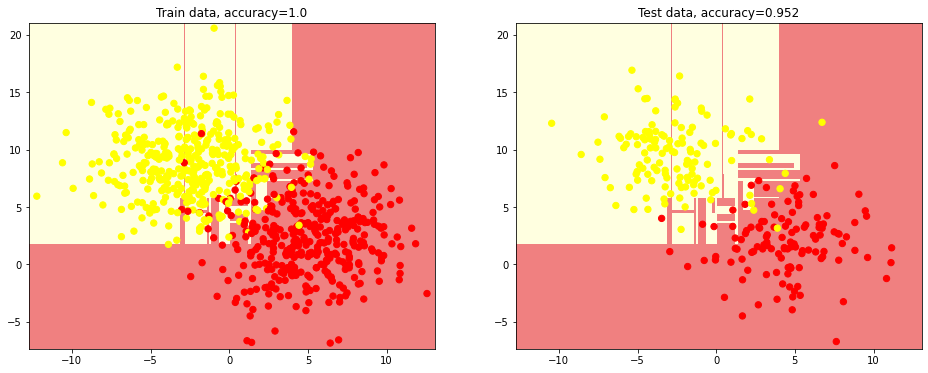

In [16]:
plot_decision_surface(clf, X_train, y_train, X_test, y_test)

#### Посмотрим на менее удачный датасет

In [17]:
X_circles, y_circles = make_circles(n_samples=1000, noise=0.3, random_state=42)

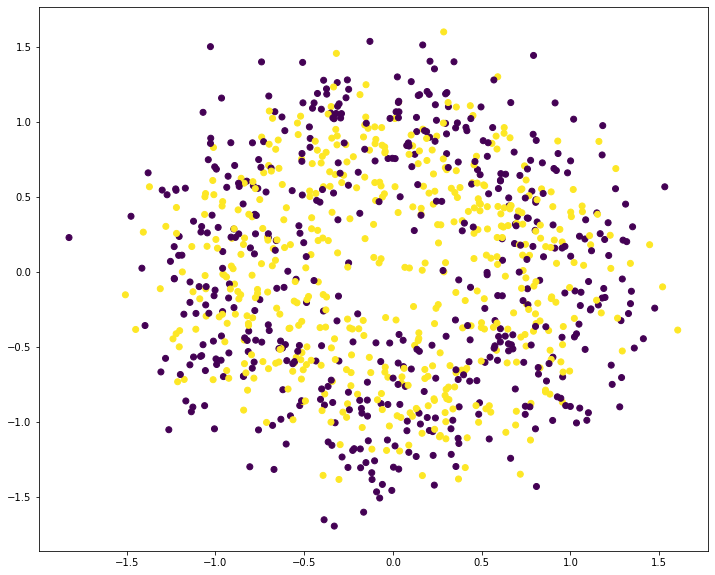

In [18]:
plt.figure(figsize=(12,10))
plt.scatter(X_circles[:,0], X_circles[:,1], c=y_circles)

In [19]:
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, random_state=42)

In [20]:
clf_circles = DecisionTreeClassifier(random_state=42)
clf_circles.fit(X_train_circles, y_train_circles)
predict = clf_circles.predict(X_test_circles)
print(f"Accuracy: {clf_circles.score(X_test_circles, y_test_circles)}")
print(f"Accuracy on CV: {np.mean(cross_val_score(clf_circles, X_circles, y_circles, cv=5))}")

Accuracy: 0.504
Accuracy on CV: 0.5409999999999999


C:\Users\daris\AppData\Local\Temp/ipykernel_11384/702121009.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
C:\Users\daris\AppData\Local\Temp/ipykernel_11384/702121009.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


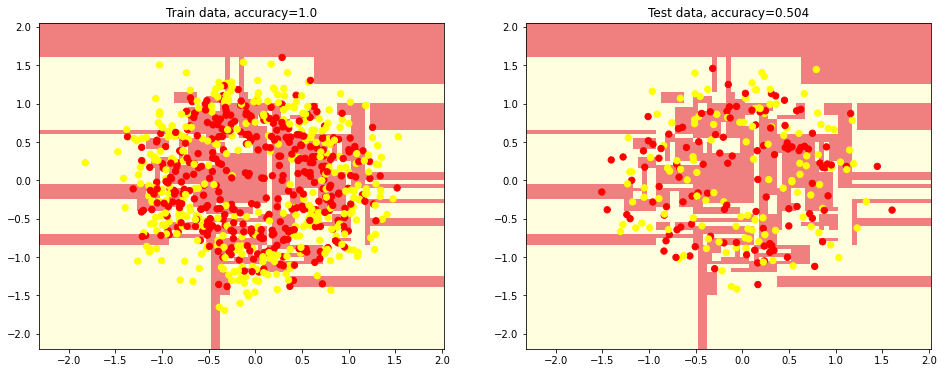

In [21]:
plot_decision_surface(clf_circles, X_train_circles, y_train_circles, X_test_circles, y_test_circles)

In [22]:
clf_circles = RandomForestClassifier(n_estimators=500, random_state=42)
clf_circles.fit(X_train_circles, y_train_circles)
predict = clf_circles.predict(X_test_circles)
print(f"Accuracy: {clf_circles.score(X_test_circles, y_test_circles)}")
print(f"Accuracy on CV: {np.mean(cross_val_score(clf_circles, X_circles, y_circles, cv=5))}")

Accuracy: 0.516
Accuracy on CV: 0.541


C:\Users\daris\AppData\Local\Temp/ipykernel_11384/702121009.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
C:\Users\daris\AppData\Local\Temp/ipykernel_11384/702121009.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


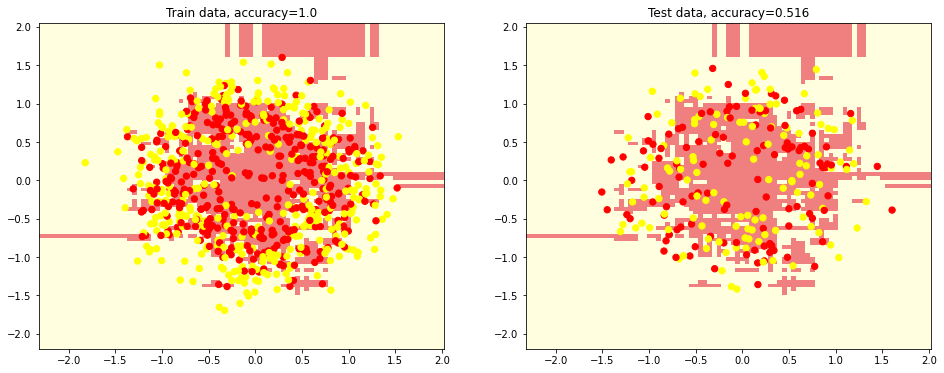

In [23]:
plot_decision_surface(clf_circles, X_train_circles, y_train_circles, X_test_circles, y_test_circles)

### Давайте посмотрим, какие параметры решающего дерева можно менять

In [24]:
DecisionTreeClassifier()

DecisionTreeClassifier()

C:\Users\daris\AppData\Local\Temp/ipykernel_11384/702121009.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
C:\Users\daris\AppData\Local\Temp/ipykernel_11384/702121009.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


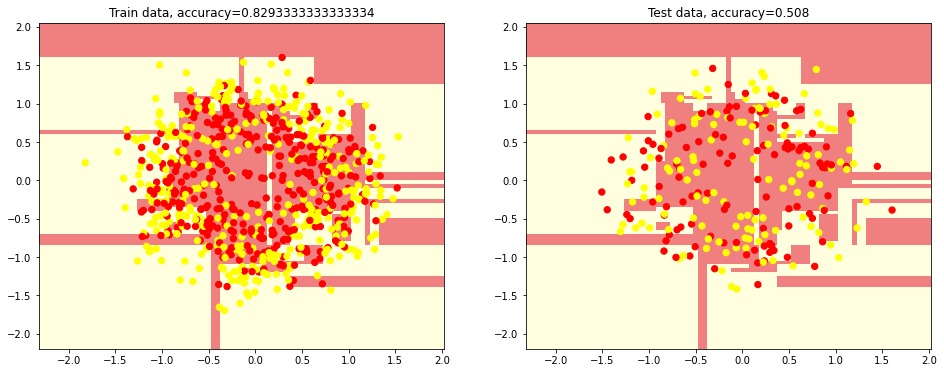

In [25]:
plot_decision_surface(DecisionTreeClassifier(max_depth=10), X_train_circles, y_train_circles, X_test_circles, y_test_circles)

#### Самостоятельная работа
Изучите зависимость качества работы алгоритма на тесте при изменении параметров

1.   max_depth
2.   min_samples_leaf

Нарисуйте график

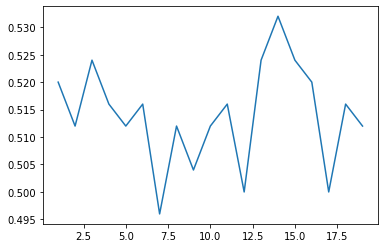

In [26]:
# Todo: изучить качество работы алгоритма при изменении max_depth
accuracies = []

ranges = range(1, 20)
for depth in ranges:
  clf_circles = DecisionTreeClassifier(max_depth=depth, random_state=42)
  clf_circles.fit(X_train_circles, y_train_circles)
  accuracies.append(clf_circles.score(X_test_circles, y_test_circles))

plt.plot(list(ranges), accuracies)

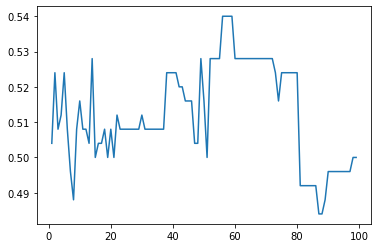

In [27]:
# Todo: изучить качество работы алгоритма при изменении min_samples_leaf
### Ваш код здесь
accuracies = []

for min_samples_leaf in range(1, 100, 1):
  clf_circles = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
  clf_circles.fit(X_train_circles, y_train_circles)
  accuracies.append(clf_circles.score(X_test_circles, y_test_circles))

plt.plot(list(range(1, 100, 1)), accuracies)

### Посмотрим на качество на обучении и кросс-валидации

In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
def draw_accuracy_graph(alg, param, grid_list, X, y):
    # Инициализируем валидацию
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    train_acc = []
    test_acc = []
    temp_train_acc = []
    temp_test_acc = []
    trees_grid = grid_list
    
    # Обучаем на тренировочном датасете
    for ntrees in trees_grid:
        _kwargs = {param:ntrees}
        rfc = alg(**_kwargs)
        temp_train_acc = []
        temp_test_acc = []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            rfc.fit(X_train, y_train)
            temp_train_acc.append(rfc.score(X_train, y_train))
            temp_test_acc.append(rfc.score(X_test, y_test))
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)

    train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
    print("Best accuracy on CV is {:.2f}% with {} {}".format(max(test_acc.mean(axis=1))*100, 
                                                            trees_grid[np.argmax(test_acc.mean(axis=1))],
                                                            param))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
    ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
    ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
    ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
    ax.legend(loc='best')
    ax.set_ylabel("Accuracy")
    ax.set_xlabel(param)

Best accuracy on CV is 56.10% with 11 max_depth


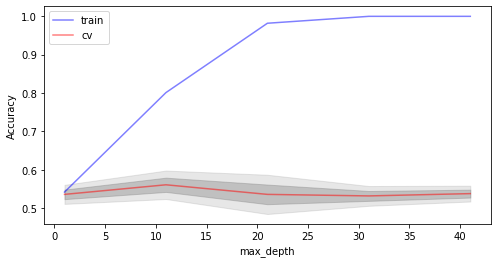

In [29]:
draw_accuracy_graph(DecisionTreeClassifier,'max_depth', list(range(1, 51, 10)), X_circles, y_circles)

Best accuracy on CV is 59.60% with 62 min_samples_leaf


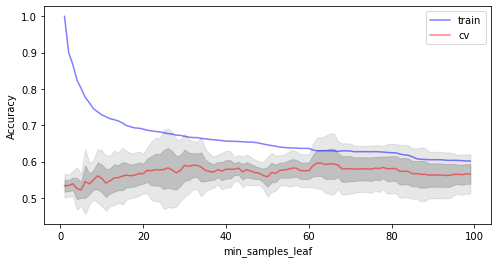

In [30]:
draw_accuracy_graph(DecisionTreeClassifier,'min_samples_leaf', list(range(1, 100)), X_circles, y_circles)

# Случайный лес

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data / https://drive.google.com/file/d/1ynddxhNnhmGgZVqdy0M4zTuD8r3C4cBP/view?usp=sharing

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

### Посмотрим на данные

In [31]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [33]:
bioresponse = pd.read_csv('train.csv', header=0, sep=',')

In [34]:
bioresponse.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [35]:
bioresponse.shape

(3751, 1777)

In [36]:
bioresponse.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [37]:
bioresponse_target = bioresponse.Activity.values
bioresponse_data = bioresponse.iloc[:, 1:]

In [38]:
Counter(bioresponse_target)

Counter({1: 2034, 0: 1717})

### Обучим RandomForestClassifier

#### Посмотрим на кривые обучения для леса, где деревья небольшой глубины

In [39]:
rf_classifier_low_depth = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=42)

In [40]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_low_depth, 
                                               bioresponse_data, 
                                               bioresponse_target,
                                               train_sizes=np.arange(0.1, 1., 0.2), 
                                               cv=3, 
                                               scoring='accuracy')

In [41]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 250  750 1250 1750 2250]
[0.75733333 0.71422222 0.70746667 0.70761905 0.70148148]
[0.62570445 0.64648505 0.67289166 0.67875108 0.68354682]


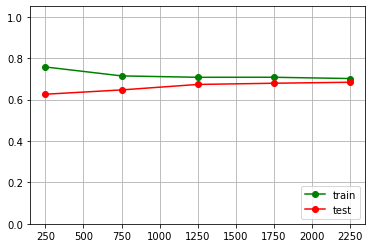

In [42]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right');

#### Посмотрим на кривые обучения для леса, где деревья глубже

In [43]:
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

In [44]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, 
                                               bioresponse_data, 
                                               bioresponse_target,
                                               train_sizes=np.arange(0.1, 1., 0.2), 
                                               cv=3, 
                                               scoring='accuracy')

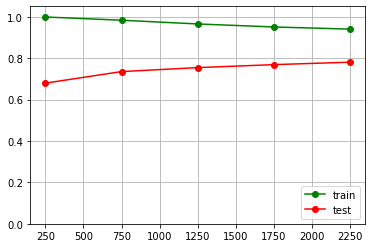

In [45]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right');

#### Самостоятельная работа: посмотрим на кривые обучения для леса, где деревья неглубокие, но их много

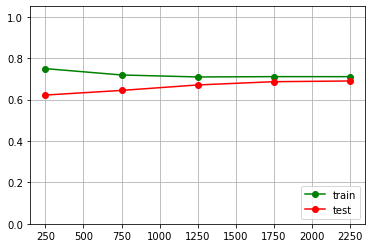

In [46]:
### Ваш код здесь 
rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=42)
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, 
                                               bioresponse_data, 
                                               bioresponse_target,
                                               train_sizes=np.arange(0.1, 1., 0.2), 
                                               cv=3, 
                                               scoring='accuracy')
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right');

# Ансамбли – делаем случайный лес сами

## Посмотрим на данные

Возьмем известный нам датасет с цифрами

In [47]:
digits = load_digits()
X = digits.data
y = digits.target

In [48]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [49]:
y

array([0, 1, 2, ..., 8, 9, 8])

## Самостоятельная работа

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. 

Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

### Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. 

In [50]:
### Ваш код здесь
clf = DecisionTreeClassifier(random_state=42)
np.mean(cross_val_score(clf, X, y, cv=10))

0.8335909373060211

### Воспользуйтесь sklearn.ensemble BaggingClassifier и обучите его над DecisionTreeClassifier. 

Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [51]:
### Ваш код здесь
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
np.mean(cross_val_score(clf, X, y, cv=10))

0.9270732464307884

In [52]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
np.mean(cross_val_score(clf, X, y, cv=10))

0.9493544382371197

#### Используйте только $\sqrt{d}$ признаков

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на  $\sqrt{d}$случайных признаков. 

Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [53]:
### Ваш код здесь
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, max_features=int(np.sqrt(X.shape[1])), random_state=42)
np.mean(cross_val_score(clf, X, y, cv=10))

0.9298851644941031

#### Попробуйте выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева

Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. 

In [54]:
### Ваш код здесь
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_features='sqrt'),
                                        n_estimators=100, random_state=42)
np.mean(cross_val_score(clf, X, y, cv=10))

0.9549224084419615